<a href="https://colab.research.google.com/github/AngelTroncoso/Analisis_de_Datos_Google/blob/main/Informe_Financiero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
#Then you can use the uploaded file, for example:
import pandas as pd
df = pd.read_excel("/content/1000-Registros-de-ventas.xlsx") #Replace your_file.csv with the name of your file
print(df.head())

Saving 1000-Registros-de-ventas.xlsx to 1000-Registros-de-ventas (3).xlsx
User uploaded file "1000-Registros-de-ventas (3).xlsx" with length 114193 bytes
  IDCliente                    Zona              País     Tipodeproducto  \
0     C2421                  Europa    United Kingdom             Snacks   
1     C1908                  Europa             Malta           Cárnicos   
2     C7652     Australia y Oceanía  Marshall Islands           Cereales   
3     C2326                  África              Iran             Frutas   
4     C5305  Centroamérica y Caribe         Guatemala  Alimento infantil   

  Canaldeventa Prioridad Fechapedido   IDPedido Fechaenvío  Unidades  \
0      Offline   Crítica  2020-10-12  242113196 2020-11-30      5530   
1       Online      Alta  2020-01-26  190800607 2020-01-28       994   
2       Online   Crítica  2020-11-09  765228068 2020-11-21      6845   
3      Offline      Baja  2021-08-21  232631909 2021-10-02      9806   
4      Offline     Media  202


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   IDCliente          1000 non-null   object        
 1   Zona               1000 non-null   object        
 2   País               1000 non-null   object        
 3   Tipodeproducto     1000 non-null   object        
 4   Canaldeventa       1000 non-null   object        
 5   Prioridad          1000 non-null   object        
 6   Fechapedido        1000 non-null   datetime64[ns]
 7   IDPedido           1000 non-null   int64         
 8   Fechaenvío         1000 non-null   datetime64[ns]
 9   Unidades           1000 non-null   int64         
 10  PrecioUnitario     1000 non-null   float64       
 11  Costeunitario      1000 non-null   float64       
 12  Importeventatotal  1000 non-null   float64       
 13  ImporteCostetotal  1000 non-

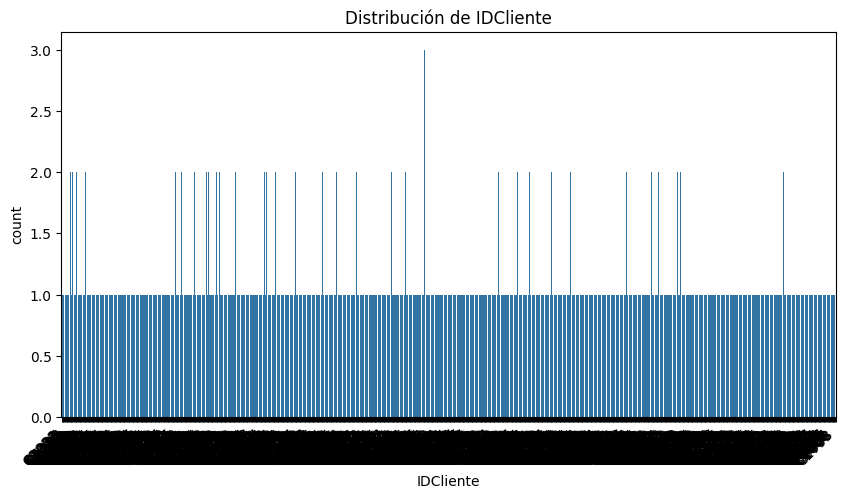


Análisis de la variable 'Zona':
Zona
África                    376
Europa                    240
Asia                      162
Centroamérica y Caribe    102
Australia y Oceanía        95
Norteamérica               25
Name: count, dtype: int64


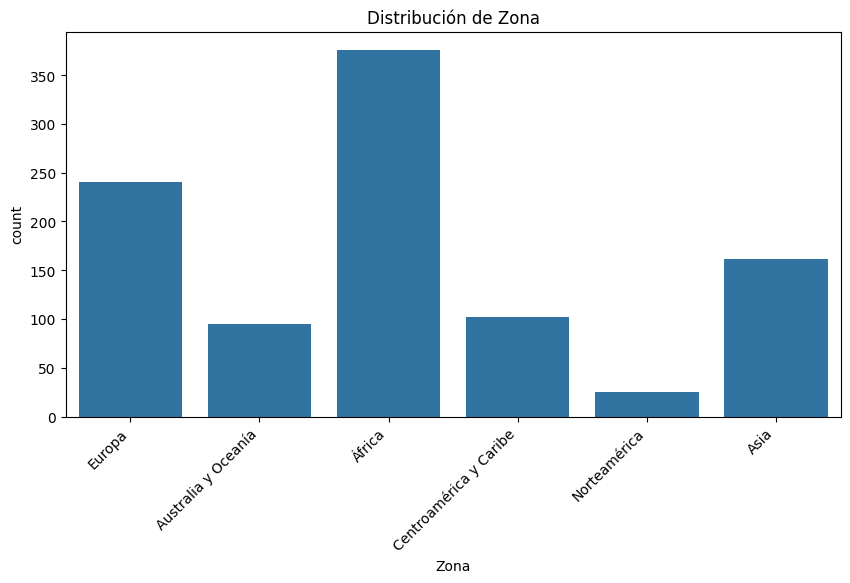


Análisis de la variable 'País':
País
Liberia         12
The Gambia      11
Lebanon         11
Greenland       11
Samoa           10
                ..
South Africa     2
Djibouti         2
Algeria          1
Guinea           1
Belarus          1
Name: count, Length: 184, dtype: int64


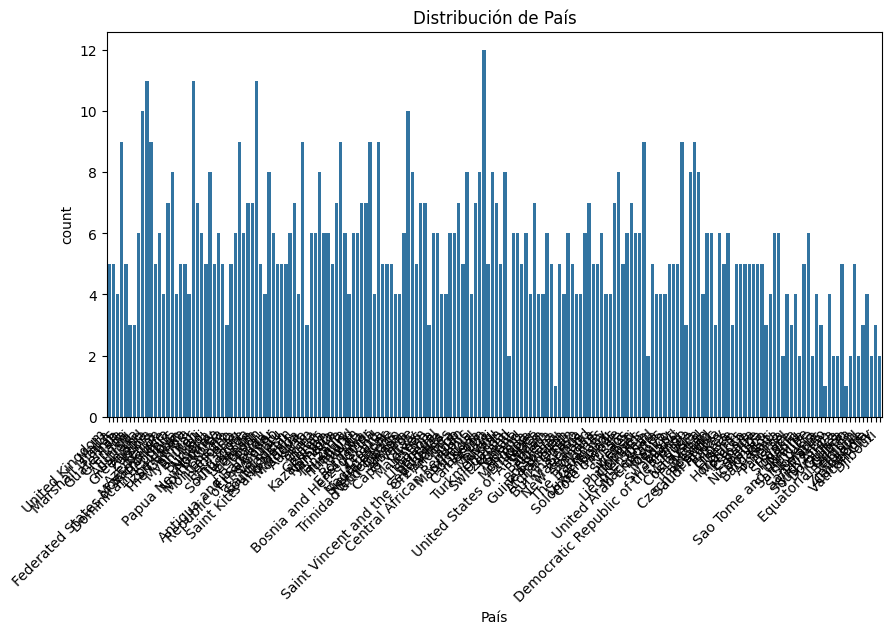


Análisis de la variable 'Tipodeproducto':
Tipodeproducto
Cereales               95
Verduras               89
Bebida                 87
Snacks                 87
Frutas                 86
Cárnicos               84
Cuidado personal       84
Doméstico              83
Material de oficina    80
Ropa                   78
Cosméticos             74
Alimento infantil      73
Name: count, dtype: int64


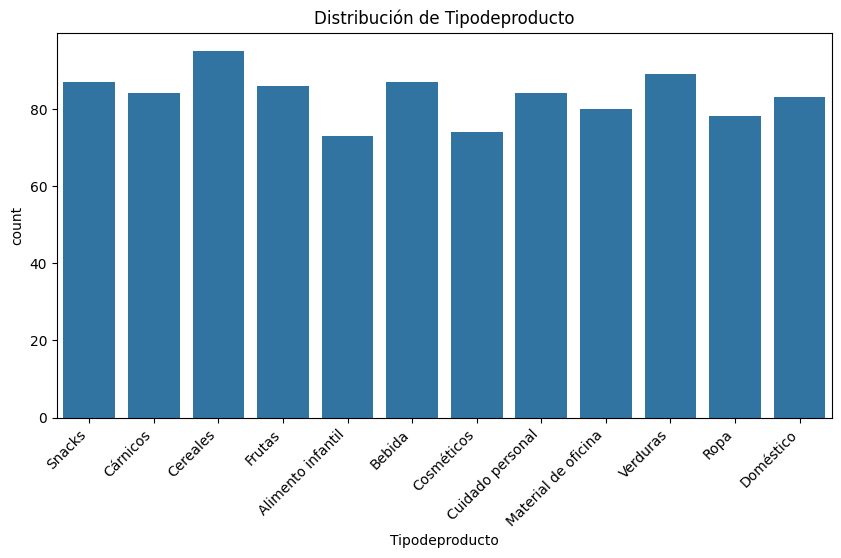


Análisis de la variable 'Canaldeventa':
Canaldeventa
Offline    521
Online     479
Name: count, dtype: int64


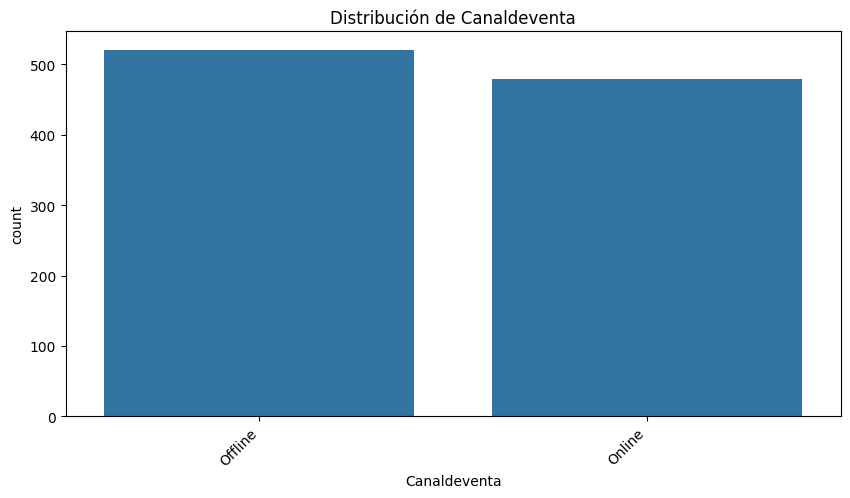


Análisis de la variable 'Prioridad':
Prioridad
Baja       261
Crítica    249
Alta       247
Media      243
Name: count, dtype: int64


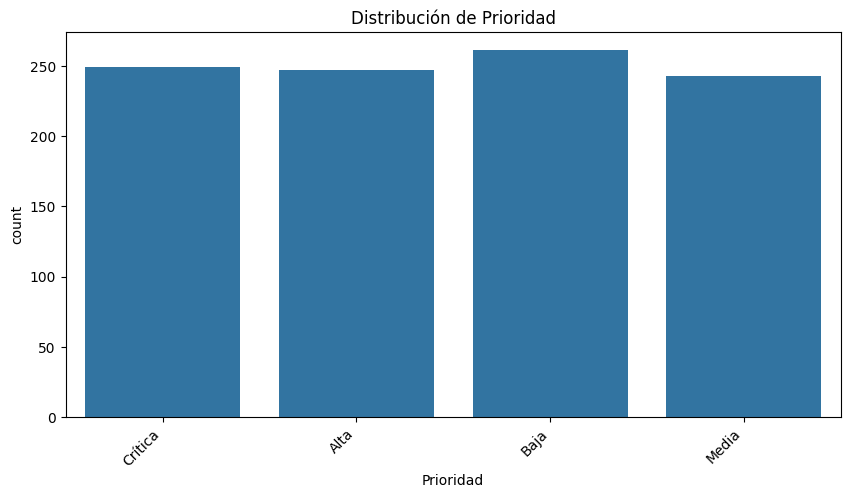


Análisis de la variable 'IDPedido':


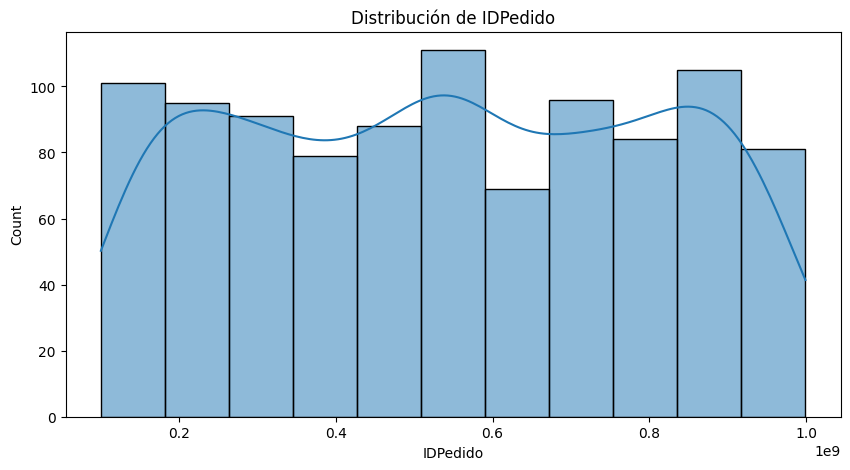


Análisis de la variable 'Unidades':


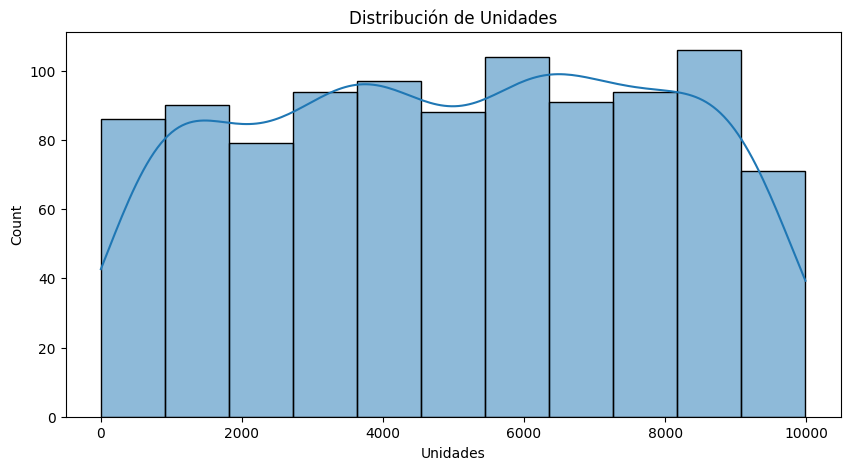


Análisis de la variable 'PrecioUnitario':


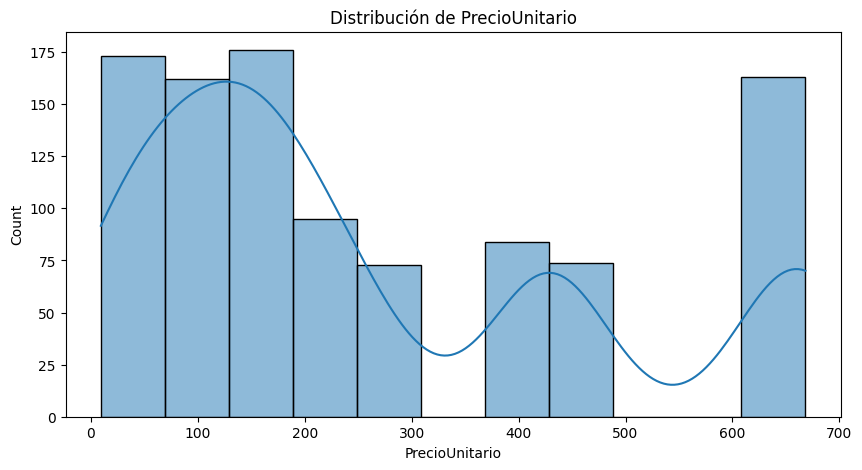


Análisis de la variable 'Costeunitario':


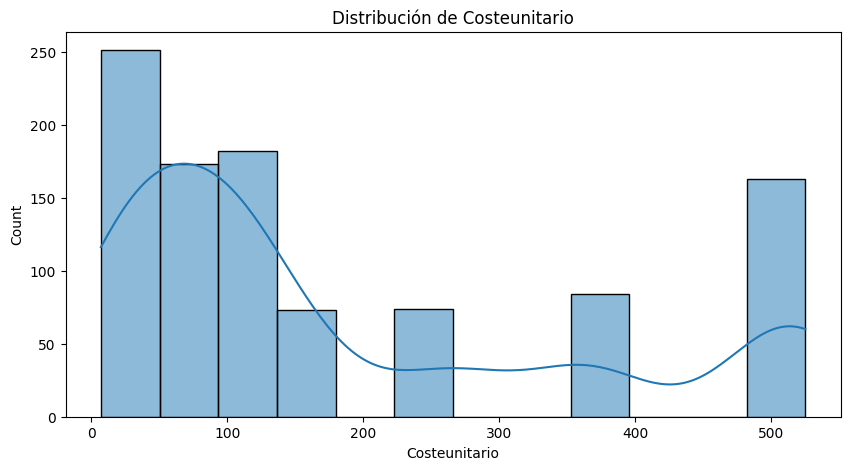


Análisis de la variable 'Importeventatotal':


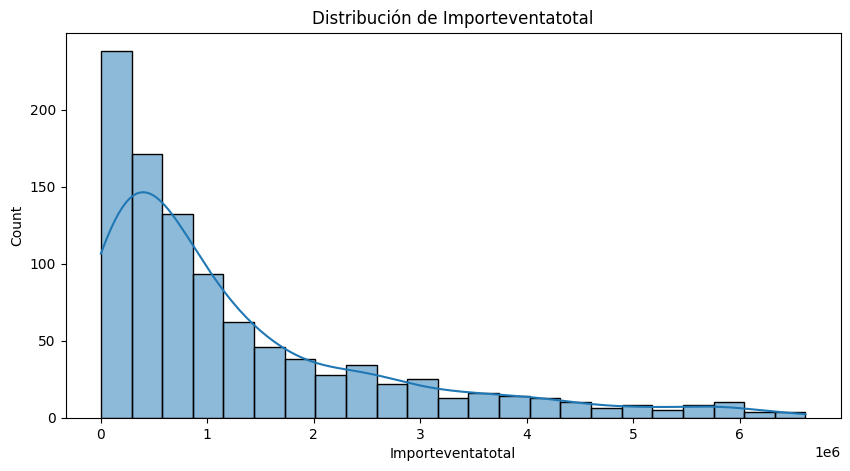


Análisis de la variable 'ImporteCostetotal':


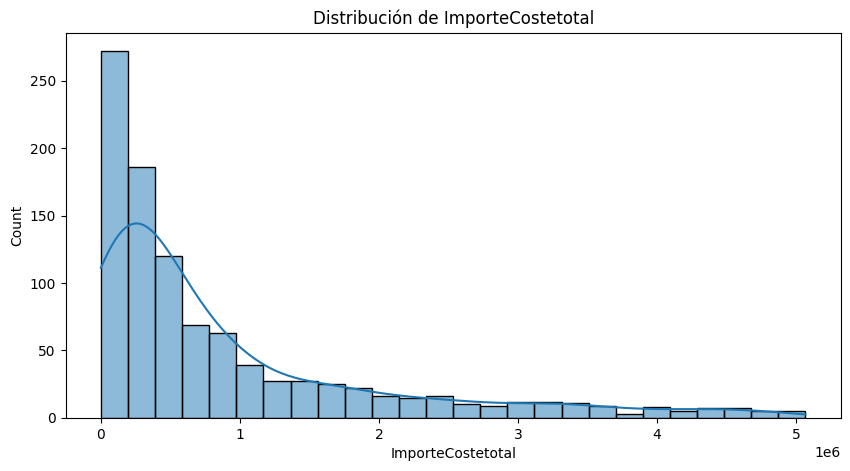


Matriz de correlación:
                   IDPedido  Unidades  PrecioUnitario  Costeunitario  \
IDPedido           1.000000 -0.000092       -0.010206      -0.005922   
Unidades          -0.000092  1.000000       -0.035276      -0.036150   
PrecioUnitario    -0.010206 -0.035276        1.000000       0.986512   
Costeunitario     -0.005922 -0.036150        0.986512       1.000000   
Importeventatotal  0.001291  0.505804        0.724422       0.711885   
ImporteCostetotal  0.003091  0.455032        0.740756       0.749237   

                   Importeventatotal  ImporteCostetotal  
IDPedido                    0.001291           0.003091  
Unidades                    0.505804           0.455032  
PrecioUnitario              0.724422           0.740756  
Costeunitario               0.711885           0.749237  
Importeventatotal           1.000000           0.987566  
ImporteCostetotal           0.987566           1.000000  


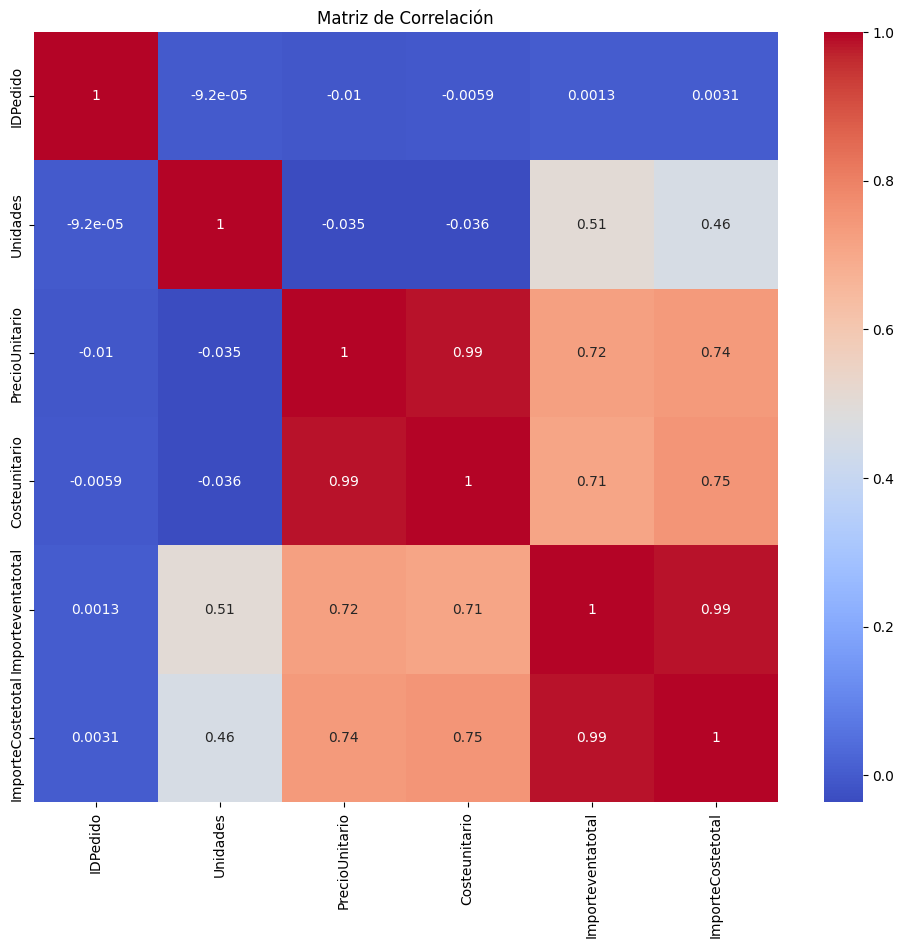

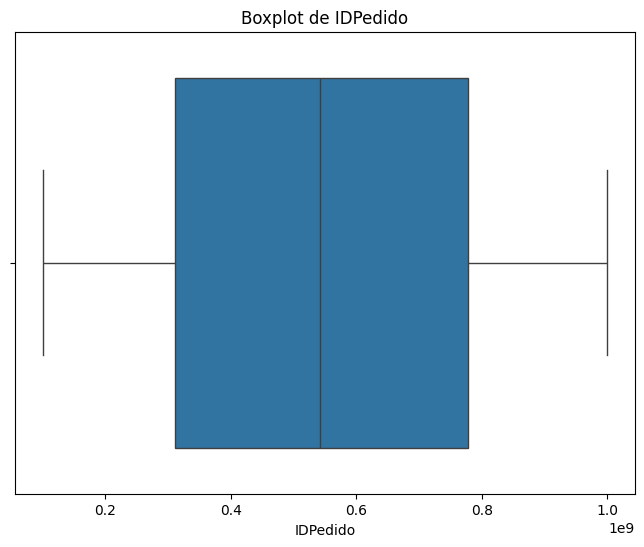

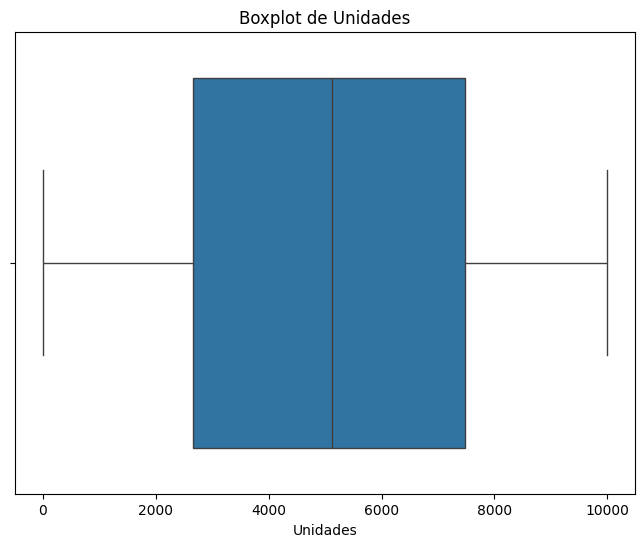

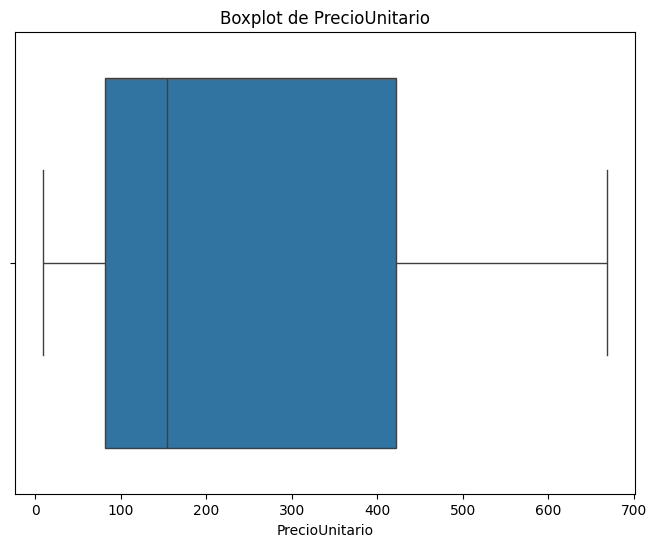

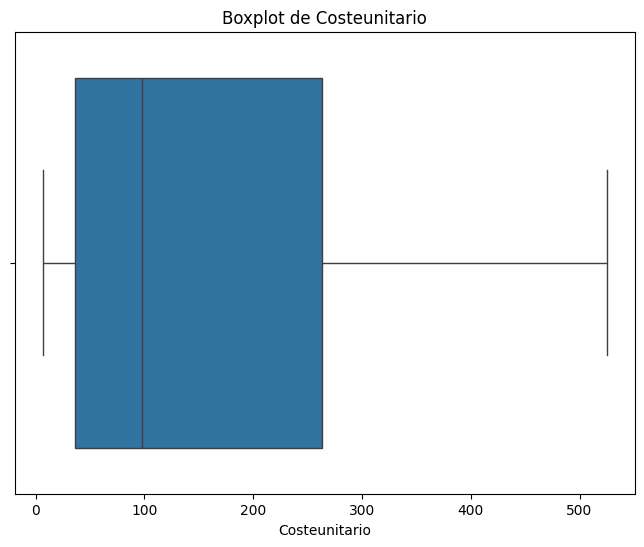

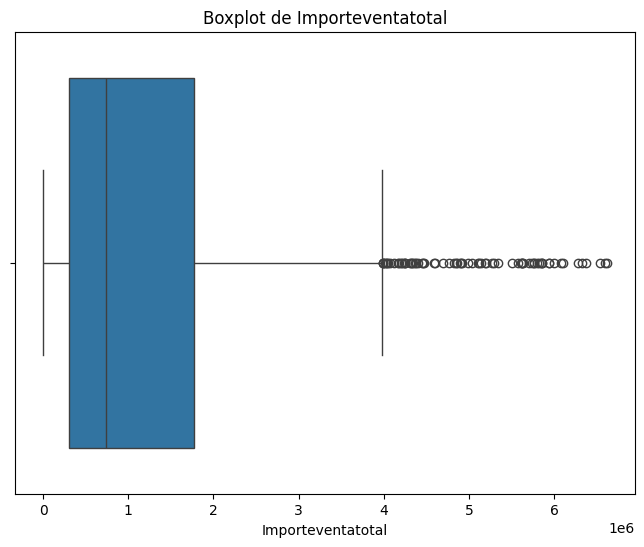

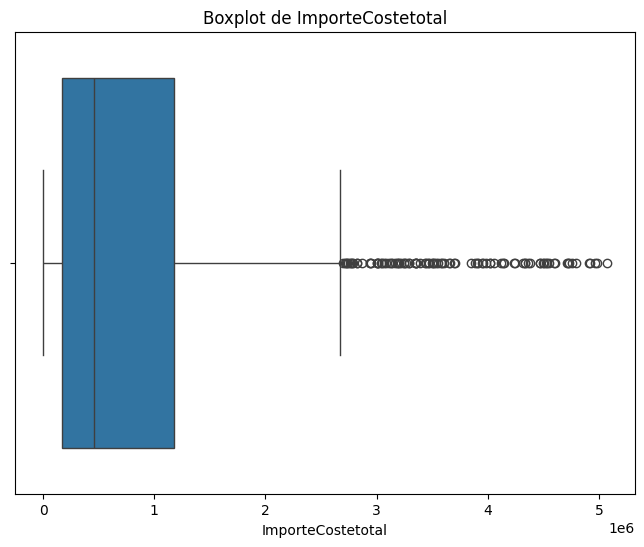


--- Fin del Análisis Exploratorio de Datos ---


In [10]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo (asumiendo que es un archivo Excel)
try:
  df = pd.read_excel("/content/1000-Registros-de-ventas.xlsx")
except FileNotFoundError:
  print("Error: Archivo no encontrado. Asegúrate de que el nombre del archivo sea correcto.")
  exit() # Salir si no se encuentra el archivo
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    exit()

# --- Análisis Exploratorio de Datos (DEA) ---

# 1. Información general del DataFrame
print("\nInformación general del DataFrame:")
print(df.info())

# 2. Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe(include='all')) #Incluye todas las columnas

# 3. Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())


# 4. Análisis de variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  print(f"\nAnálisis de la variable '{col}':")
  print(df[col].value_counts())
  plt.figure(figsize=(10, 5))
  sns.countplot(x=col, data=df)
  plt.xticks(rotation=45, ha='right')
  plt.title(f'Distribución de {col}')
  plt.show()


# 5. Análisis de variables numéricas
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
  print(f"\nAnálisis de la variable '{col}':")
  plt.figure(figsize=(10, 5))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribución de {col}')
  plt.show()


# 6. Correlación entre variables numéricas
numerical_df = df.select_dtypes(include=['number']) # Select only numerical columns
correlation_matrix = numerical_df.corr()
print("\nMatriz de correlación:")
print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


# 7. Análisis de outliers (ej. usando boxplots)
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# 8. Análisis de relaciones entre variables (ej. scatter plots)
# Para ejemplos de relaciones entre variables, se deben seleccionar pares específicos de interés según el dataset
#Ejemplo (reemplazar 'variable1' y 'variable2')
#sns.scatterplot(x='variable1', y='variable2', data=df)
#plt.show()

print("\n--- Fin del Análisis Exploratorio de Datos ---")


## Reporte Ejecutivo: Análisis de Datos de Ventas

**Resumen Ejecutivo:**

Este análisis exploratorio de datos (EDA) de 1000 registros de ventas revela información clave sobre la distribución de variables, correlaciones y posibles valores atípicos.  Se recomiendan acciones para mejorar la comprensión de los datos y su utilización en la toma de decisiones.

**Principales Hallazgos:**

* **Calidad de Datos:** El análisis inicial de valores faltantes es crucial.  Se debe determinar la causa de las ausencias en cada columna e implementar estrategias de imputación o eliminación de registros, según la magnitud y naturaleza del problema.  La descripción detallada de cada columna (tipo de dato y cantidad de valores no nulos) facilitará este proceso.
* **Variables Categóricas:**  La visualización de la distribución de las variables categóricas (e.g., con diagramas de barras) permite identificar patrones en los datos.  Las categorías con una alta frecuencia de ocurrencia merecen mayor atención, mientras que las categorías con baja frecuencia deberían ser investigadas para determinar si reflejan un fenómeno real o un error en la recolección de datos.
* **Variables Numéricas:**  El histograma y el análisis descriptivo de las variables numéricas (media, mediana, desviación estándar, cuartiles) revelan la forma y la dispersión de los datos. Se deben examinar las distribuciones con atención a la simetría y las colas. La identificación de valores atípicos (outliers), mediante boxplots, es fundamental para una interpretación correcta de las estadísticas.  Se recomienda investigar la posible causa de estos outliers y determinar si deben ser eliminados o tratados de forma distinta.
* **Correlaciones:** La matriz de correlación y el mapa de calor son herramientas esenciales para detectar relaciones lineales entre las variables numéricas.  Las fuertes correlaciones positivas o negativas pueden utilizarse para desarrollar modelos predictivos.  Las variables con alta correlación pueden indicar redundancia en los datos.
* **Análisis de Relaciones:**  Se recomienda extender el análisis de relaciones entre las variables utilizando gráficos de dispersión (scatter plots), especialmente para aquellos pares de variables que muestren una correlación significativa o un interés particular en el contexto del negocio.

**Recomendaciones:**

1. **Limpiar los Datos:**  Resolver las inconsistencias y valores faltantes en el dataset es prioridad.
2. **Profundizar en las Variables Categóricas:** Examinar el significado de cada categoría y su impacto en las ventas.
3. **Analizar Outliers:**  Investigar la causa de los valores atípicos y determinar si se requiere algún tipo de ajuste o eliminación.
4. **Modelar Relaciones:**  Evaluar la posibilidad de desarrollar modelos predictivos basados en las correlaciones observadas entre las variables, por ejemplo, para proyectar las ventas.
5. **Visualizaciones Adicionales:** Implementar gráficos de dispersión para explorar las relaciones entre variables numéricas.  En general, es importante hacer un análisis gráfico de los datos para detectar patrones más complejos y relaciones no lineales.

**Próximos Pasos:**

* Realizar una limpieza completa de los datos.
* Explorar en profundidad las variables clave relacionadas con las ventas.
* Desarrollar y evaluar modelos predictivos.

Este reporte proporciona una visión inicial de los datos.  Se requiere un análisis más detallado para obtener conclusiones más robustas y recomendaciones más precisas.
